In [17]:
isLocalServer = True
sys_path_to_be_added = '/notebook/personal/ksuchoi216/FaceID_model_rebuild/'
config_path = './configs/config.json'

%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os

def checkLocalServer(isLocalServer, sys_path_to_be_added=None):
    print(f'isLocalServer is {isLocalServer}')
    if isLocalServer is True:
        if sys_path_to_be_added not in sys.path:
            sys.path.insert(0, sys_path_to_be_added)
            os.chdir(sys_path_to_be_added)

checkLocalServer(isLocalServer, sys_path_to_be_added)

from utils import Config_Manager
cfgm = Config_Manager(config_path)
cfg = cfgm.get_cfg()
!pwd
!nvidia-smi

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
isLocalServer is True
/notebook/personal/ksuchoi216/FaceID_model_rebuild
Fri Oct 14 14:44:29 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.129.06   Driver Version: 470.129.06   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:04:00.0 Off |                    0 |
| N/A   32C    P0    33W / 250W |   1333MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+------

extracted_np_97
loading from ./data/extracted_np_97/face_emb.npy
loading from ./data/extracted_np_97/face_lb.npy
shape: (1157, 512) (1157,)
df shape: (1157, 3)


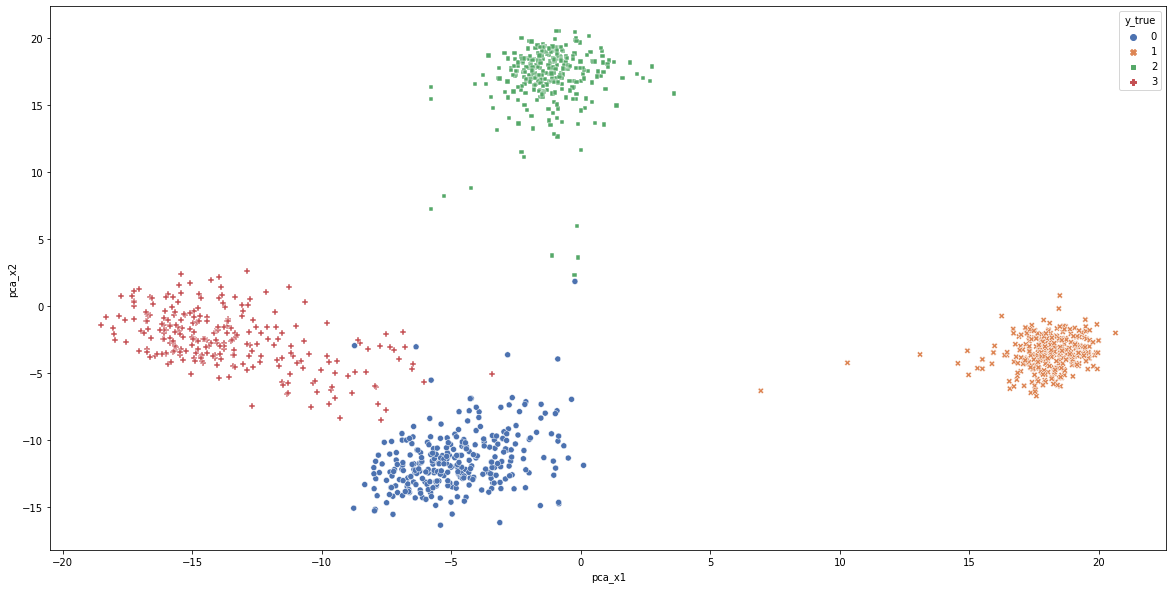

In [18]:
import numpy as np

from data_preprocessing import loadNumpy
from utils import show_pca

user_names = ["jhyoo", "jhoh", "jhongyoo", "kschoi"]

threshold = 0.97
save_folder = 'extracted_np_' + str(int(threshold*100))
print(save_folder)
emb_numpy = loadNumpy('data', save_folder ,'face_emb.npy')
label_numpy = loadNumpy('data', save_folder , 'face_lb.npy')

print(f'shape: {emb_numpy.shape} {label_numpy.shape}')

show_pca(emb_numpy, label_numpy)

x: (1157, 512) projected_x: (1157, 512)


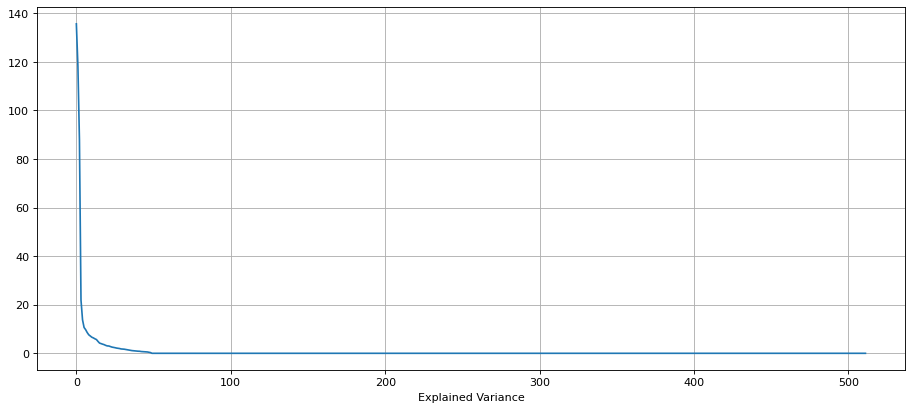

<Figure size 432x288 with 0 Axes>

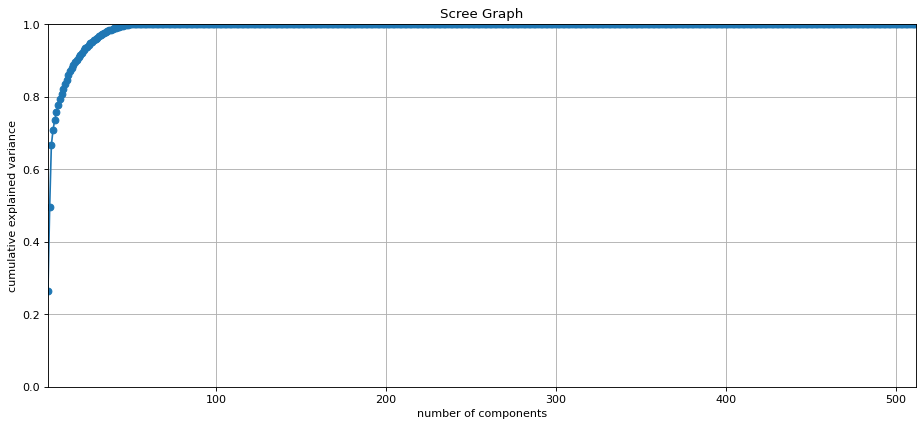

The number of total dimension: 512
The number of dimension to keep 0.8:            8


In [19]:
from utils import show_screegraph

show_screegraph(emb_numpy, 512, info_percent=0.8)
